# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [1]:
import pandas as pd
import numpy as np

# read de data
df = pd.read_csv('student_data.csv')
df.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

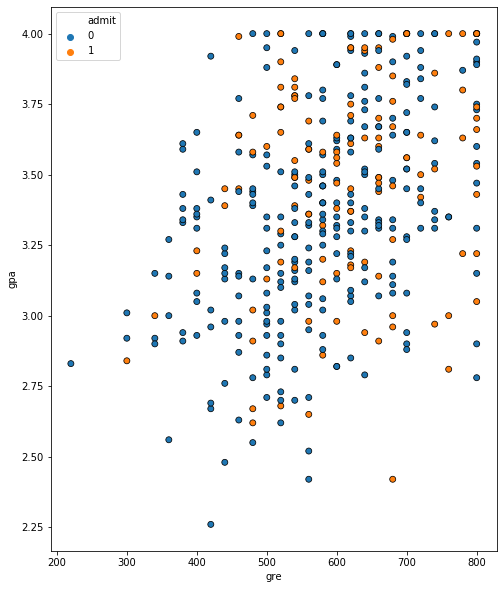

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 10))
sns.scatterplot(x= df['gre'], y= df['gpa'], hue= df['admit'], edgecolor='k')

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

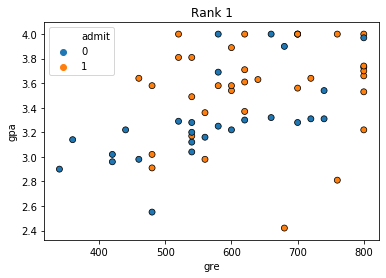

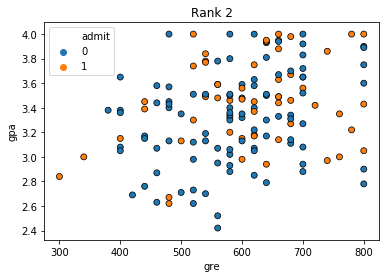

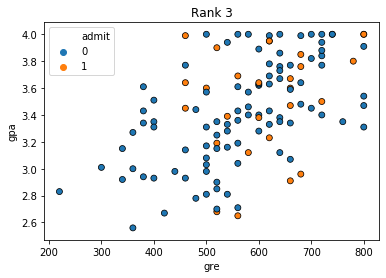

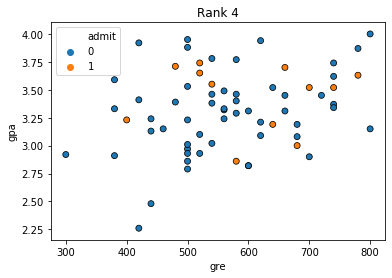

In [3]:
df_rank1 = df[df['rank']==1]
df_rank2 = df[df['rank']==2] 
df_rank3 = df[df['rank']==3]
df_rank4 = df[df['rank']==4]

sns.scatterplot(x= 'gre', y= 'gpa', hue='admit', data= df_rank1, edgecolor='k')
plt.title("Rank 1")
plt.show()
sns.scatterplot(x= 'gre', y= 'gpa', hue='admit', data= df_rank2, edgecolor='k')
plt.title("Rank 2")
plt.show()
sns.scatterplot(x= 'gre', y= 'gpa', hue='admit', data= df_rank3, edgecolor='k')
plt.title("Rank 3")
plt.show()
sns.scatterplot(x= 'gre', y= 'gpa', hue='admit', data= df_rank4, edgecolor='k')
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## One-hot encoding the rank

In [4]:
# get dummies
dummies = pd.get_dummies(df['rank'], prefix='rank')

# concate both dfs
df = pd.concat([df, dummies], axis=1)

# drop previous rank column
df.drop(['rank'], axis=1, inplace=True)

df.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Scaling

In [5]:
df['gre'] = df['gre']/(df['gre'].max())
df['gpa'] = df['gpa']/(df['gpa'].max())

df.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting data Train and Test

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].values
y = df['admit'].values

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (360, 6) (360,)
Test set: (40, 6) (40,)


## Training 1-layer Neural Network

Use a log loss function

In [7]:
# functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def log_loss(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [8]:
# hyperparameters
epochs = 1000
learn_rate = 0.5

# initialize weights 
np.random.seed(42)
n_records, n_features = X_train.shape

weights = np.random.normal(scale = 1 /n_features**2, size=n_features)


for epoch in range(epochs):
    dev_w = np.zeros(weights.shape)
    for x, y in zip(X_train, y_train):
        yhat = sigmoid(np.matmul(x, weights))
        error = log_loss(y, yhat)
        error_term = - (y - yhat)
        dev_w += error_term * x
    
    weights += -learn_rate * dev_w/n_records
    
    if epoch % 100 == 0:
        yhat = sigmoid(np.matmul(X_train, weights))
        error_mean = np.mean(log_loss(y_train, yhat))
        print('epoch:', epoch,
              '\tloss:', error_mean)

epoch: 0 	loss: 0.6734566854184011
epoch: 100 	loss: 0.6064131894357689
epoch: 200 	loss: 0.6039806286214138
epoch: 300 	loss: 0.6023127458664321
epoch: 400 	loss: 0.6008675758258978
epoch: 500 	loss: 0.5995919639572865
epoch: 600 	loss: 0.5984564752234454
epoch: 700 	loss: 0.5974379976191124
epoch: 800 	loss: 0.5965179342600653
epoch: 900 	loss: 0.5956812588167202


In [9]:
W = weights
W

array([ 1.02541321, -0.35095205, -0.32925679, -1.00247746, -1.60557867,
       -1.76951027])

### Test data

In [10]:
output_test = sigmoid(np.matmul(X_test, W))
predictions = output_test > 0.5 # boolean list, prediction = 1 es la norma
accuracy = np.mean(predictions == y_test)
print('accuracy: {}%'.format(accuracy*100))


accuracy: 80.0%


In [11]:
output_test

array([0.20206849, 0.53172562, 0.2070153 , 0.25154577, 0.19059436,
       0.3521273 , 0.24427694, 0.21560521, 0.44497973, 0.26736683,
       0.50074499, 0.19953408, 0.2430187 , 0.54987513, 0.26441811,
       0.43094279, 0.48805329, 0.42086037, 0.26736683, 0.2425748 ,
       0.53492564, 0.37611023, 0.55404497, 0.34436112, 0.34853289,
       0.32813558, 0.33502623, 0.33444009, 0.18974096, 0.26629954,
       0.20326028, 0.42012574, 0.22531999, 0.24476804, 0.28106091,
       0.33981942, 0.40320124, 0.24185558, 0.17686163, 0.40721898])

In [12]:
predictions

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [13]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## Training 2-layer Neural Network

Use a MSE as loss function

In [14]:
# hyperparameters
epochs = 1000
learn_rate = 0.005

# initialize weights 
np.random.seed(42)
n_records, n_features = X_train.shape
n_hidden = 2

weights_input_hidden = np.random.normal(scale = 1/n_features**0.5, size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale =1/n_hidden**0.5, size=(n_hidden))


for epoch in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(X_train, y_train):
        hidden_input = np.matmul(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.matmul(hidden_output, weights_hidden_output))     
        
        error = y - output
        output_error_term = error * output * (1 - output)
        
        hidden_error_term = output_error_term * weights_hidden_output * hidden_output * (1 - hidden_output)    
        
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]
        
    weights_input_hidden += learn_rate * del_w_input_hidden/n_records
    weights_hidden_output += learn_rate * del_w_hidden_output/ n_records
     
    
    if epoch % 100 == 0:
        hidden_input = np.matmul(X_train, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.matmul(hidden_output, weights_hidden_output))
        loss = np.mean((output - y_train) ** 2) # MSE
 
        print('epoch:', epoch,
             'loss:', loss)

epoch: 0 loss: 0.21874677228082184
epoch: 100 loss: 0.21872877972954646
epoch: 200 loss: 0.21871103976076434
epoch: 300 loss: 0.2186935419274964
epoch: 400 loss: 0.2186762761940074
epoch: 500 loss: 0.21865923292067369
epoch: 600 loss: 0.2186424028493358
epoch: 700 loss: 0.21862577708912453
epoch: 800 loss: 0.2186093471027495
epoch: 900 loss: 0.21859310469324073


In [15]:
print(weights_input_hidden)
print(weights_hidden_output)

[[ 0.20331608 -0.06145935]
 [ 0.26472191  0.61830392]
 [-0.09417754 -0.10626343]
 [ 0.64544461  0.30707732]
 [-0.19273459  0.22889678]
 [-0.19030485 -0.181665  ]]
[ 0.17999725 -1.34810661]


### Test data

In [16]:
hidden_output = sigmoid(np.matmul(X_test, weights_input_hidden))
output_test = sigmoid(np.matmul(hidden_output, weights_hidden_output))
predictions = output_test > 0.5
accuracy = np.mean(predictions == y_test)
print('accuracy: {}%'.format(accuracy*100))

accuracy: 72.5%
